<a href="https://colab.research.google.com/github/Ramaseshanr/ANLP/blob/master/CosDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       D1     D2     D3     D4     D5     D6     D7     D8     D9    D10  \
0    0.00  27.64  90.00  48.45  47.48  48.23  42.62  57.97  45.77  65.30   
1   27.64   0.00  90.00  47.11  55.41  65.84  42.41  71.23  50.86  74.96   
2   90.00  90.00   0.00  56.46  55.03  71.81  59.46  81.44  64.82  41.73   
3   48.45  47.11  56.46   0.00  24.38  46.58  28.50  58.48  38.25  45.25   
4   47.48  55.41  55.03  24.38   0.00  33.66  37.57  46.91  37.12  25.94   
5   48.23  65.84  71.81  46.58  33.66   0.00  58.13  54.34  57.92  40.46   
6   42.62  42.41  59.46  28.50  37.57  58.13   0.00  62.96  41.09  53.48   
7   57.97  71.23  81.44  58.48  46.91  54.34  62.96   0.00  34.86  51.14   
8   45.77  50.86  64.82  38.25  37.12  57.92  41.09  34.86   0.00  47.22   
9   65.30  74.96  41.73  45.25  25.94  40.46  53.48  51.14  47.22   0.00   
10  62.64  58.76  61.70  49.68  39.26  61.25  50.50  69.10  61.49  44.50   

      D11  
0   62.64  
1   58.76  
2   61.70  
3   49.68  
4   39.26  
5   61.25  
6  

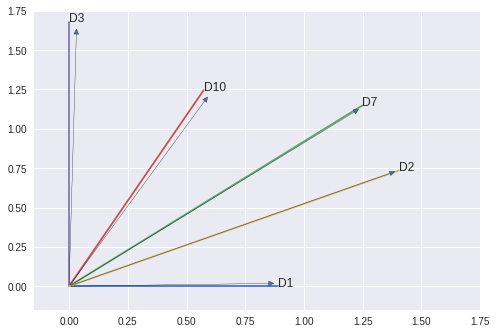

In [55]:
from numpy import *
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def plot_point(point, angle, length):
    ''' 
    #Source - https://stackoverflow.com/questions/28417604/plotting-a-line-from-a-coordinate-with-and-angle
    #
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = length * math.sin(math.radians(angle))
    endx = length * math.cos(math.radians(angle))

    # plot the points
    #fig = plt.figure()
    #ax = plt.subplot(111)

    return ([x,endx],[y,endy])
    #ax.plot([x, endx], [y, endy])
    

    #return fig

doc_term = array([
    [0.1, 0.1, 0.0, 0.1, 0.2, 0.0, 0.1, 0.9, 0.9, 0.3, 0.0, 0.8],
    [0.1, 0.0, 0.0, 0.1, 0.2, 0.0, 0.1, 0.9, 0.9, 0.3, 0.0, 0.8],
    [0.0, 0.0, 0.9, 0.2, 0.3, 0.1, 0.7, 0.0, 0.2, 0.7, 0.5, 0.5],
    [0.0, 0.0, 0.9, 0.9, 0.5, 0.1, 0.9, 0.3, 0.8, 0.4, 0.1, 0.4],
    [0.4, 0.0, 0.0, 0.2, 0.5, 0.9, 0.3, 0.7, 0.4, 0.6, 0.0, 0.3],
    [0.6, 0.6, 0.0, 0.7, 0.3, 0.3, 0.9, 0.1, 0.9, 0.0, 0.0, 0.3],
    [0.0, 0.0, 0.8, 0.6, 0.6, 0.6, 0.0, 0.1, 0.4, 0.9, 0.3, 0.1],
    [0.4, 0.4, 0.0, 0.5, 0.5, 0.1, 0.7, 0.1, 0.5, 0.3, 0.8, 0.1],
    [0.3, 0.3, 0.0, 0.9, 0.8, 0.7, 0.7, 0.8, 0.6, 0.6, 0.8, 0.0],
    [0.0, 0.0, 0.5, 0.0, 0.2, 0.0, 0.0, 0.1, 0.3, 0.4, 0.5, 0.3]
])

cos_list = []
pd_cols = []
header = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11']
for i in range(0,11):
    for j in range(0,11):
        cos_value = dot(transpose(doc_term[:, [i]]), doc_term[:, [j]]) / (norm(doc_term[:, [j]]) * norm(doc_term[:, [i]])).tolist()
        cos_list.append( asscalar( around(math.degrees(math.acos(min(max(cos_value,-1.0),1.0))), decimals=2) ))
    pd_cols.append(cos_list)
    cos_list = []
df = pd.DataFrame(pd_cols, columns=header)
print(df)
fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylim([-0.15, 1.75])  # set the bounds to be 10, 10
ax.set_xlim([-0.15, 1.75])
X,Y = plot_point([0,0],df.iloc[0]['D1'], norm(doc_term[:, [0]]))
P,Q = plot_point([0,0],df.iloc[0]['D3'], norm(doc_term[:, [3]]))
A,B = plot_point([0,0],df.iloc[0]['D7'], norm(doc_term[:, [7]]))
M,N = plot_point([0,0],df.iloc[0]['D10'], norm(doc_term[:, [10]]))
R,S = plot_point([0,0],df.iloc[0]['D2'], norm(doc_term[:, [2]]))


plt.annotate("D10", xy=(M[0], N[0]), xytext=(M[1], N[1]),arrowprops=dict(arrowstyle='<|-'))
plt.annotate("D1",xy=(X[0], Y[0]),xytext=(X[1], Y[1]),arrowprops=dict(arrowstyle='<|-'))
plt.annotate("D7",xy=(A[0], B[0]),xytext=(A[1], B[1]),arrowprops=dict(arrowstyle='<|-'))
plt.annotate("D3",xy=(P[0], Q[0]),xytext=(P[1], Q[1]),arrowprops=dict(arrowstyle='<|-'))
plt.annotate("D2",xy=(R[0], S[0]),xytext=(R[1], S[1]),arrowprops=dict(arrowstyle='<|-'))

print (P,Q)
ax.plot(X,Y)
ax.plot(A,B)
ax.plot(M,N)
ax.plot(P,Q)
ax.plot(R,S)

fig.show()